## COVID Cough Capstone - Modeling 

In [1]:
import pandas as pd
import numpy as np 

from sklearn.model_selection import train_test_split

In [35]:
#libraries for random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score


##### Load the file

* Does my data involve a time series or forecasting? If so, am I splitting the train and test data appropriately?
*  Is my response variable continuous or categorical?

In [3]:
df_audio = pd.read_csv ('patient_info_audio.csv')

In [4]:
df_audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27549 entries, 0 to 27548
Columns: 138 entries, Unnamed: 0 to mfcc_min
dtypes: float64(17), int64(120), object(1)
memory usage: 29.0+ MB


In [5]:
df_audio['datetime'] = pd.to_datetime(df_audio['datetime'])

In [6]:
df_audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27549 entries, 0 to 27548
Columns: 138 entries, Unnamed: 0 to mfcc_min
dtypes: datetime64[ns, UTC](1), float64(17), int64(120)
memory usage: 29.0 MB


In [7]:
df_audio.head()

,Unnamed: 0,datetime,cough_detected,latitude,longitude,age,gender_female,gender_male,gender_other,respiratory_condition_False,...,spec_cent_max,spec_bw_mean,spec_bw_max,rolloff_mean,rolloff_max,zcr_mean,zcr_max,mfcc_mean,mfcc_max,mfcc_min
0,0,2020-04-11 19:37:13.279037+00:00,0.0396,NaN,NaN,NaN,0,0,0,0,...,8643.121363,2528.608396,5737.569994,4741.798134,15999.169922,0.093798,0.274414,-3.664643,254.66293,-277.932040
1,1,2020-11-27 12:08:05.795269+00:00,0.8014,48.3,-1.5,67.0,1,0,0,1,...,18915.416645,3377.612557,6350.198655,5619.722946,21317.871094,0.073610,0.343750,-4.290027,214.22739,-11.241102
2,2,2020-04-14 06:45:05.925650+00:00,0.6086,39.8,64.4,22.0,0,1,0,1,...,10120.249909,2460.946615,6109.350601,4337.534999,17205.029297,0.105732,0.428711,-6.005171,248.92534,-88.177900
3,3,2020-04-19 07:58:56.194180+00:00,0.0977,13.7,-89.2,20.0,0,1,0,0,...,10120.249909,2734.758435,6604.815393,5077.971004,17205.029297,0.081322,0.653809,-4.017477,227.15442,-91.822930
4,4,2020-04-11 02:01:08.084013+00:00,0.0535,NaN,NaN,36.0,1,0,0,1,...,10153.549088,4492.883108,6687.462198,9315.142500,16946.630859,0.132605,0.365723,-2.786305,215.57559,-22.162752


In [8]:
df_audio['Year'] = df_audio['datetime'].dt.year
df_audio['Month'] = df_audio['datetime'].dt.month
df_audio['Day']= df_audio['datetime'].dt.day
df_audio['Day_of_Week']= df_audio['datetime'].dt.dayofweek


In [9]:
df_audio.head()

,Unnamed: 0,datetime,cough_detected,latitude,longitude,age,gender_female,gender_male,gender_other,respiratory_condition_False,...,rolloff_max,zcr_mean,zcr_max,mfcc_mean,mfcc_max,mfcc_min,Year,Month,Day,Day_of_Week
0,0,2020-04-11 19:37:13.279037+00:00,0.0396,NaN,NaN,NaN,0,0,0,0,...,15999.169922,0.093798,0.274414,-3.664643,254.66293,-277.932040,2020,4,11,5
1,1,2020-11-27 12:08:05.795269+00:00,0.8014,48.3,-1.5,67.0,1,0,0,1,...,21317.871094,0.073610,0.343750,-4.290027,214.22739,-11.241102,2020,11,27,4
2,2,2020-04-14 06:45:05.925650+00:00,0.6086,39.8,64.4,22.0,0,1,0,1,...,17205.029297,0.105732,0.428711,-6.005171,248.92534,-88.177900,2020,4,14,1
3,3,2020-04-19 07:58:56.194180+00:00,0.0977,13.7,-89.2,20.0,0,1,0,0,...,17205.029297,0.081322,0.653809,-4.017477,227.15442,-91.822930,2020,4,19,6
4,4,2020-04-11 02:01:08.084013+00:00,0.0535,NaN,NaN,36.0,1,0,0,1,...,16946.630859,0.132605,0.365723,-2.786305,215.57559,-22.162752,2020,4,11,5


In [10]:
df_audio = df_audio.drop(['datetime', 'Unnamed: 0'],axis=1)

In [11]:
df_audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27549 entries, 0 to 27548
Columns: 140 entries, cough_detected to Day_of_Week
dtypes: float64(17), int64(123)
memory usage: 29.4 MB


In [12]:
df_audio['latitude'] = df_audio['latitude'].fillna(0)
df_audio['longitude'] = df_audio['longitude'].fillna(0)
df_audio['age'] = df_audio['age'].fillna(df_audio['age'].median())

In [13]:
df_audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27549 entries, 0 to 27548
Columns: 140 entries, cough_detected to Day_of_Week
dtypes: float64(17), int64(123)
memory usage: 29.4 MB


In [82]:
df_audio.to_csv('updated_audio_features.csv')

In [16]:
df_col = [col for col in df_audio.columns if 'status' in col]
df_col

['status_COVID-19', 'status_healthy', 'status_symptomatic']

In [17]:
print(df_audio.loc[:,['status_COVID-19', 'status_healthy', 'status_symptomatic']])
#Reduce Demensionality to just people who have COVID 

       status_COVID-19  status_healthy  status_symptomatic
0                    0               0                   0
1                    0               1                   0
2                    0               1                   0
3                    0               1                   0
4                    1               0                   0
...                ...             ...                 ...
27544                0               0                   0
27545                0               0                   1
27546                0               1                   0
27547                0               1                   0
27548                0               0                   0

[27549 rows x 3 columns]


#### Train/Test Split 

In [22]:
# y is only the COVID status of the patient
y = df_audio['status_COVID-19']

In [23]:
# X Sound features
X = df_audio.drop(['status_COVID-19'], axis=1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

### Modeling

In [52]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt 
import seaborn as sns

In [46]:
pipeline = [] 

pipeline.append(RandomForestClassifier())
pipeline.append(RidgeClassifier())
pipeline.append(KNeighborsClassifier())
pipeline.append(DecisionTreeClassifier())
pipeline.append(GaussianNB())

In [47]:
model_list = ['Random Forest', 'Ridge Classifier', 'KNN', ' Decision Tree', 'Naive Bayes']
acc_list = []
auc_list = []
cm_list = []

In [48]:
for model in pipeline: 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_list.append(metrics.accuracy_score(y_test, y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    auc_list.append(round(metrics.auc(fpr, tpr),2))
    cm_list.append(confusion_matrix(y_test, y_pred))

### Classification Report

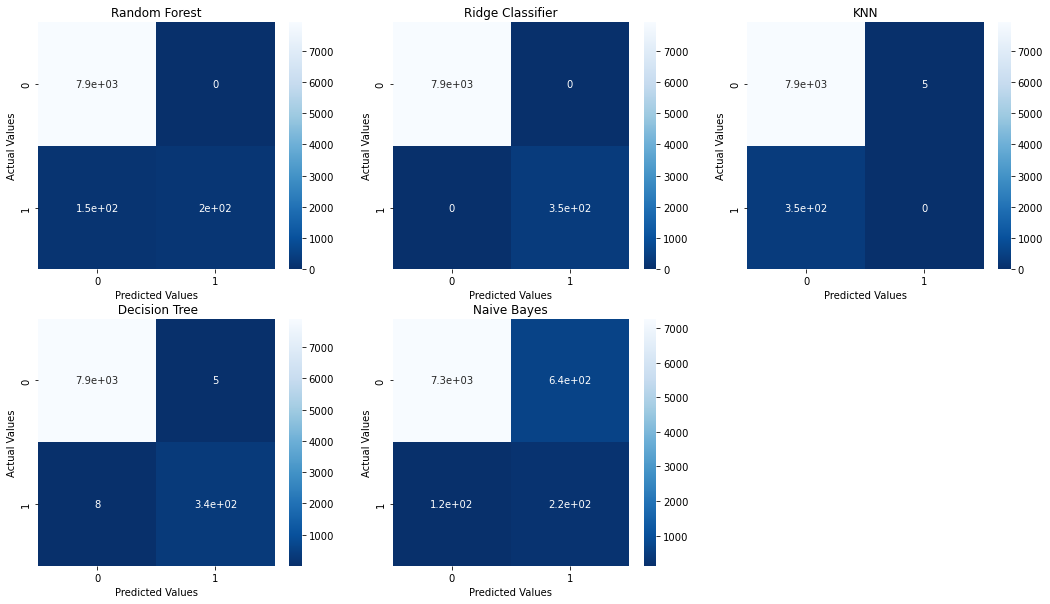

In [56]:
# Ploting Confusion Matrix
fig = plt.figure(figsize = (18,10))
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2,3,i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap='Blues_r')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')

In [60]:
#accuracy and AUC
result_df = pd.DataFrame({'Model': model_list, 'Accuracy': acc_list, 'AUC': auc_list})
result_df

,Model,Accuracy,AUC
0,Random Forest,0.981367,0.78
1,Ridge Classifier,1.000000,1.00
2,KNN,0.957048,0.50
3,Decision Tree,0.998427,0.99
4,Naive Bayes,0.907199,0.78


In [ ]:
#Based on this  

### Feature Importance

In [ ]:
#Find the leaking feature 

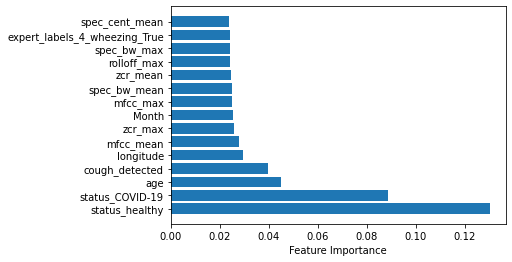

<Figure size 864x432 with 0 Axes>

AttributeError: 'RidgeClassifier' object has no attribute 'feature_importances_'

In [81]:
for model in pipeline:
    sort = model.feature_importances_.argsort()
    plt.barh(df_audio.columns[sort][::-1][0:15], model.feature_importances_[sort][::-1][0:15])
    plt.xlabel("Feature Importance")
    plt.figure(figsize=(12, 6))
    plt.show()